In [ ]:
import math
import itertools
import numpy as np 				# pip install numpy
import matplotlib.pyplot as plt # pip install matplotlib
import scipy as sp 				# pip install scipy
from scipy import stats 		# Used to generate gamma pdf array

# Settings for matplotlib figure size and font
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["font.family"] = "CMU Serif"

In [ ]:
########################################################################################################################
# Simulation 1
# Comparison of the graph of Gamma(alpha_+beta_, lambda_) and the histogram of a X+Y of X~Gamma(alpha_, lambda_) and
# Y~Gamma(beta_, lambda_) random variables
########################################################################################################################
def histogram_gamma_sum(alpha_=1, beta_=3, lambda_=3):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	u = x + y
	# produces histogram
	plt.title(fr"(X+Y) where X$\sim$Gamma({alpha_}, {lambda_}) and Y$\sim$Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.hist(u, bins=10000, density=True, color="darkblue")
	plt.annotate("(X+Y)", xy=(3, 0.6), size=14, ha="center", va="center", color="darkblue")
	plt.ylim([0, 0.8])
	plt.xlim([0, 5])
	# prints histogram
	plt.show()


def gamma(alpha_=1, beta_=3, lambda_=3):
	x = np.linspace(0, 60, 1000000)
	y = sp.stats.gamma.pdf(x, (alpha_+beta_), scale=1/lambda_)

	plt.title("Probability Density Function of Gamma Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color="firebrick")
	plt.annotate(f"Gamma({alpha_}+{beta_}, {lambda_})", xy=(3, 0.6), size=14, ha="center", va="center", color="firebrick")
	plt.ylim([0, 0.8])
	plt.xlim([0, 5])
	plt.show()

histogram_gamma_sum(1, 3, 3)
gamma(1, 3, 3)

In [ ]:
########################################################################################################################
# Simulation 2
# Comparison of the graph of beta(alpha_, beta_) and the histogram of a X/(X+Y) of X~Gamma(alpha_, lambda_) and
# Y~Gamma(beta_, lambda_) random variables
########################################################################################################################

def histogram_beta(alpha_=2, beta_=5, lambda_=1):
	# x and y are vectors of 1000000 i.i.d. Gamma(alpha_,lambda_) r.v.
	x = np.random.gamma(alpha_, 1/lambda_, 1000000)
	y = np.random.gamma(beta_, 1/lambda_, 1000000)
	# r.v. of interest
	v = x/(x + y)
	# produces histogram
	plt.title(fr"X/(X+Y) where X$\sim$Gamma({alpha_}, {lambda_}) and Y$\sim$Gamma({beta_}, {lambda_})", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.hist(v, bins=10000, density=True, color="darkblue")
	plt.annotate(r"$\dfrac{X}{X+Y}$", xy=(0.6, 2.7), size=14, ha="center", va="center", color="darkblue")
	plt.ylim([0, 3])
	plt.xlim([0, 1])
	# prints histogram
	plt.show()


def beta(alpha_=2, beta_=5):
	x = np.linspace(0, 1, 10000)
	y = sp.stats.beta.pdf(x, alpha_, beta_)

	plt.title("Probability Density Function of Beta Distribution", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y, linewidth=3, color="firebrick")
	plt.annotate(f"Beta({alpha_}, {beta_})", xy=(0.6, 2.7), size=14, ha="center", va="center", color="firebrick")
	plt.ylim([0, 3])
	plt.xlim([0, 1])
	plt.show()


histogram_beta(2, 5, 1)
beta(2, 5)

In [ ]:
########################################################################################################################
# Probability Density Function of Gamma Distribution
########################################################################################################################

def gamma_distribution_pdf(alpha_=4, lambda_=3):
    # Array with values from 0 to 25 with 10000 equal increments
    x = np.linspace(0, 25, 10000)

    # f(x) for X ~ Gamma(alpha_,lambda_)
    fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * \
        (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)

    # Generating graph using matplotlib
    plt.title("Probability Density Function of Gamma Distribution", fontsize=20)
    plt.annotate(f"Gamma({alpha_}, {lambda_})", xy=(15, 0.0012),
                 size=14, ha="center", va="center", color="firebrick")
    plt.xlabel("T", fontsize=16)
    plt.ylabel("Density", fontsize=16)
    plt.plot(x, fx, color="firebrick")
    plt.show()

########################################################################################################################
# Cumulative Distribution Function of Gamma Distribution
########################################################################################################################

def gamma_distribution_cdf(alpha_=4, lambda_=3):
    # Array with values from 0 to 25 with 10000 equal increments
    x = np.linspace(0, 25, 10000)

    # f(x) for X ~ Gamma(alpha_,lambda_)
    fx = (((1/lambda_)**alpha_)/math.gamma(alpha_)) * \
        (x**(1/lambda_)) * np.exp(-(1/lambda_)*x)

    dx = 0.0025 # Same as gap between values in array x
    fxdx = fx * dx
    Fx = np.array(list(itertools.accumulate(fxdx)))

    # Generating graph using matplotlib
    plt.title("Cumulative Distribution Function of Gamma Distribution", fontsize=20)
    plt.annotate(f"Gamma({alpha_}, {lambda_})", xy=(2.5, 0.028),
                 size=14, ha="center", va="center", color="firebrick")
    plt.xlabel("T", fontsize=16)
    plt.ylabel("Probability", fontsize=16)
    plt.plot(x, Fx, color="firebrick")
    plt.show()


gamma_distribution_pdf(4, 3)
gamma_distribution_cdf(4, 3)

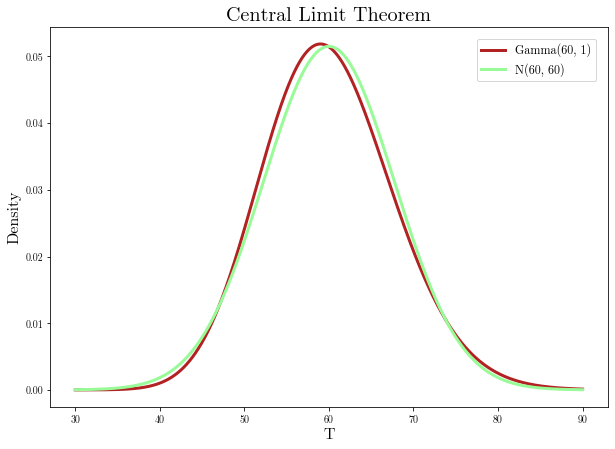

In [15]:
########################################################################################################################
# Central Limit Theorem Graph
########################################################################################################################

def central_limit_theorem(alpha_=60, lambda_=1, expected_=60, variance_=60):
	x = np.linspace(30, 90, 100000)
	y1 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_) 		# PDF of Gamma(alpha_, lambda_)
	y2 = sp.stats.norm.pdf(x, expected_, math.sqrt(variance_)) 	# PDF of N(expected_, variance_)

    # Generating graph using matplotlib
	plt.title("Central Limit Theorem", fontsize=20)
	plt.xlabel("T", fontsize=16)
	plt.ylabel("Density", fontsize=16)
	plt.plot(x, y1, label=f"Gamma({alpha_}, {lambda_})", linewidth=3, color="firebrick")
	plt.plot(x, y2, label=f"N{expected_, variance_}", linewidth=3, color="palegreen")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.show()

central_limit_theorem(60, 1, 60, 60)

In [ ]:
def plot_gamma_k(alpha_1=1, alpha_2=5, alpha_3=10 ):
	# alpha_ : the number of events for which you are waiting to occur.

	x = np.linspace(0, 50, 1000)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_1, moments="mvsk")
	y1 = sp.stats.gamma.pdf(x, alpha_1)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_2, moments="mvsk")
	y2 = sp.stats.gamma.pdf(x, alpha_2)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_3, moments="mvsk")
	y3 = sp.stats.gamma.pdf(x, alpha_3)
	plt.title("PDF of Gamma Distribution")
	plt.xlabel("T")
	plt.ylabel("Probability Density")
	plt.plot(x, y1, label=f"k = {alpha_1}", color="palegreen")
	plt.plot(x, y2, label=f"k = {alpha_2}", color="yellowgreen")
	plt.plot(x, y3, label=f"k = {alpha_3}", color="olivedrab")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.40])
	plt.xlim([0, 20])
	plt.show()

def plot_gamma_lambda(alpha_=10, lambda_1=1, lambda_2=2, lambda_3=3):
	# alpha_ : the number of events for which you are waiting to occur.
	# lambda_ : the rate of events happening following Poisson dist.

	x = np.linspace(0, 50, 1000)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_1, moments="mvsk")
	y1 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_1)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_2, moments="mvsk")
	y2 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_2)
	mean, var, skew, kurt = sp.stats.gamma.stats(alpha_, scale=1 / lambda_3, moments="mvsk")
	y3 = sp.stats.gamma.pdf(x, alpha_, scale=1/lambda_3)
	plt.title(f"PDF of Gamma Distribution (k = {alpha_})")
	plt.xlabel("T")
	plt.ylabel("Probability Density")
	plt.plot(x, y1, label=f"λ = {lambda_1}", color="gold")
	plt.plot(x, y2, label=f"λ = {lambda_2}", color="burlywood")
	plt.plot(x, y3, label=f"λ = {lambda_3}", color="darkorange")
	plt.legend(bbox_to_anchor=(1, 1), loc="upper right", borderaxespad=1, fontsize=12)
	plt.ylim([0, 0.40])
	plt.xlim([0, 20])
	plt.show()

plot_gamma_k(1, 10, 50)
plot_gamma_lambda(10, 1, 2, 3)